In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [23]:
# read csv file
folder = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves'
file = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves/TIC_5714469.csv'

tic_id = file[file.rfind('_')+1:-4]
print(tic_id)

df = pd.read_csv(file)
df

5714469


,cleaned_time,detrended_flux,trend_time,trend_flux,raw_time,raw_flux
0,1572.384335,0.929652,1572.384335,0.970888,1572.384335,0.902588
1,1572.385724,0.915736,1572.385724,0.970788,1572.385724,0.888986
2,1572.387113,0.946128,1572.387113,0.970747,1572.387113,0.918451
3,1572.388502,0.926437,1572.388502,0.970632,1572.388502,0.899230
4,1572.389891,0.962131,1572.389891,0.970398,1572.389891,0.933650
...,...,...,...,...,...,...
13471,NaN,NaN,NaN,NaN,1595.679778,0.965796
13472,NaN,NaN,NaN,NaN,1595.681167,0.979258
13473,NaN,NaN,NaN,NaN,1595.682555,0.990258
13474,NaN,NaN,NaN,NaN,1595.683944,0.980177


In [35]:
# read columns, turn into numpy arrays
cleaned_time = np.array(df['cleaned_time'])
detrended_flux = np.array(df['detrended_flux'])
trend_time = np.array(df['trend_time'])
trend_flux = np.array(df['trend_flux'])


array([0.97088837, 0.97078826, 0.97074706, ...,        nan,        nan,
              nan])

In [37]:
# removing NaNs by masking 
mask = np.isfinite(detrended_flux)

cleaned_time = cleaned_time[mask]
detrended_flux = detrended_flux[mask]
trend_time = trend_time[mask]
trend_flux = trend_flux[mask]

print(trend_flux)

[0.97088837 0.97078826 0.97074706 ... 0.99708916 0.99692348 0.99685575]


Text(0, 0.5, 'Detrended Flux')

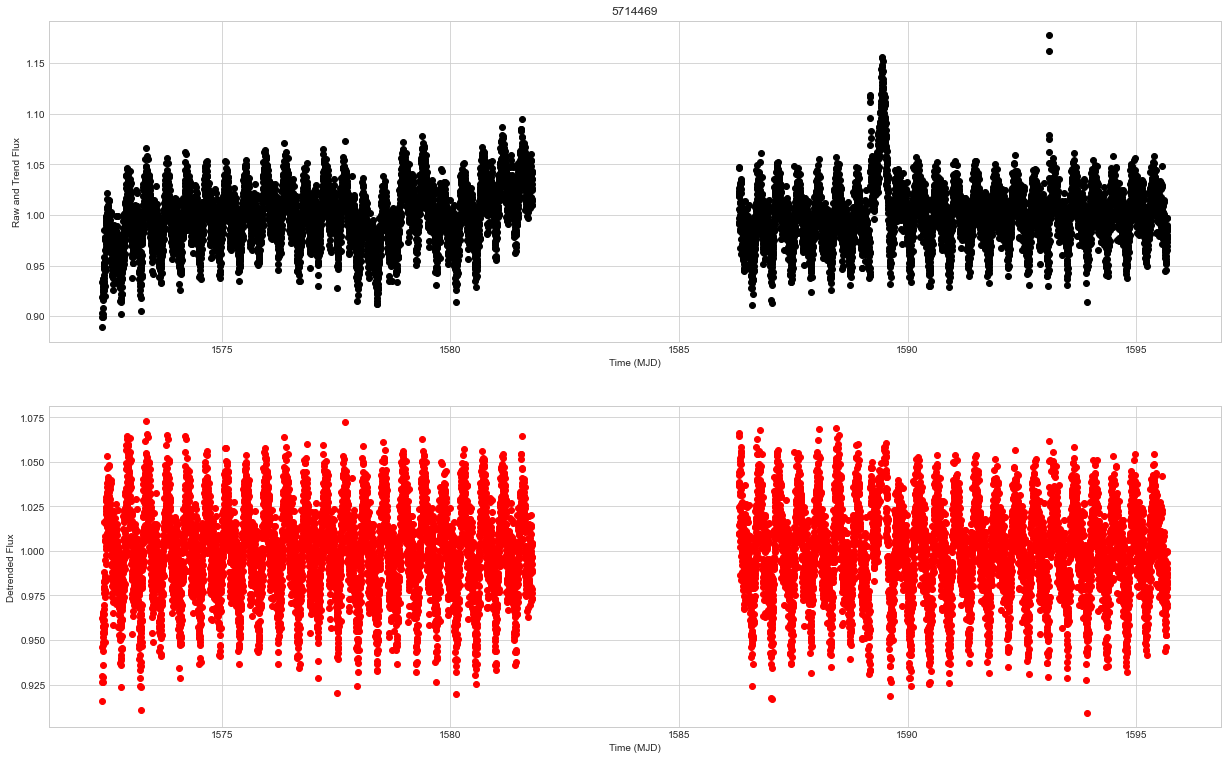

In [33]:
# all data are set, ready to graph
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(21,13))

ax1.plot(df['raw_time'], df['raw_flux'], 'o', color='black')

ax1.set_title(tic_id)
ax1.set_xlabel('Time (MJD)')
ax1.set_ylabel('Raw and Trend Flux')

ax2.plot(cleaned_time, detrended_flux, 'o', color='black')
ax2.set_xlabel('Time (MJD)')
ax2.set_ylabel('Detrended Flux')


